In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import my_functions
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Cargar user_reviews
df_reviews = pd.read_csv('Datasets/Datasets ETL/user_reviews_v1.csv')

In [22]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      58431 non-null  int64 
 1   recommend    58431 non-null  bool  
 2   user_id      58431 non-null  object
 3   posted_year  58431 non-null  int64 
 4   sentiment    58431 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.8+ MB


In [23]:
df_reviews.head()

,game_id,recommend,user_id,posted_year,sentiment
0,1250,True,76561197970982479,2011,2
1,22200,True,76561197970982479,2011,2
2,43110,True,76561197970982479,2011,2
3,251610,True,js41637,2014,2
4,227300,True,js41637,2013,2


In [24]:
my_functions.describe_df(df_reviews)

Cantidad Registros:  58431
Cantidad Campos:  5


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,game_id,int64,0,0.0,58431,100.0,3682,6.30
1,recommend,bool,0,0.0,58431,100.0,2,0.00
2,user_id,object,0,0.0,58431,100.0,25458,43.57
3,posted_year,int64,0,0.0,58431,100.0,7,0.01
4,sentiment,int64,0,0.0,58431,100.0,3,0.01


In [25]:
# Modificar tipo de columna 'id' a string
df_reviews['game_id'] = df_reviews['game_id'].astype(str)

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      58431 non-null  object
 1   recommend    58431 non-null  bool  
 2   user_id      58431 non-null  object
 3   posted_year  58431 non-null  int64 
 4   sentiment    58431 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 1.8+ MB


### Observaciones iniciales

Este dataset tiene un total de 58431 registros, sin valores únicos de identificación. 

El campo de mayor importancia en este caso sería el 'user_id'. Cada usuario realiza reseñas sobre distintos juegos, 1 reseña para cada juego que desee.

En total hay 58431 reseñas, de 25458 usuarios, para 3682 juegos.

No existen valores nulos en todo el dataset, punto que fue trabajado en el ETL.

## Exploración

### Reseñas por 'user_id'

Comenzamos explorando la cantidad de reviews por usuario.

In [26]:
# Reviews por usuario
reviews_por_usuario = df_reviews.groupby('user_id')['game_id'].count()

reviews_por_usuario = df_reviews.groupby('user_id')['game_id'].count().reset_index()
reviews_por_usuario.columns = ['user_id', 'reviews']

# Ordenar de mayor a menor según la cantidad de reviews
reviews_por_usuario = reviews_por_usuario.sort_values(by='reviews', ascending=False)

# Mostrar el resultado
reviews_por_usuario

,user_id,reviews
13335,DontCareForURL,10
22388,mixadance,10
15984,Parappatherapperisbest,10
5269,76561198062484829,10
11373,76561198123074348,10
...,...,...
10255,76561198094471302,1
10257,76561198094507877,1
10258,76561198094509661,1
10260,76561198094513310,1


In [27]:
my_functions.stats(reviews_por_usuario, 'reviews')

Campo: reviews
Valor Máximo: 10.0
Valor Mínimo: 1.0
Promedio: 2.2951920810747115


Los valores maxímos son 10 reseñas por usuario, en promedio poco más de 2, y 1 reseña como mínimo.

### Reseñas por 'game_id'

Se analiza la cantidad de reviews por juegos.

In [28]:
# Crear un DataFrame 
grouped_df = df_reviews.groupby(['game_id']).size().reset_index(name='reviews')

# Ordenar por reviews
grouped_df = grouped_df.sort_values(by='reviews', ascending=False)

# Calcular porcentaje 
total_juegos = grouped_df['reviews'].sum()

grouped_df['porcentaje'] = (grouped_df['reviews'] / total_juegos) * 100

grouped_df.head(10)

,game_id,reviews,porcentaje
3575,730,3708,6.345947
3214,440,3694,6.321987
2915,4000,1704,2.916260
3477,570,1544,2.642433
481,218620,1113,1.904811
1761,304930,1031,1.764474
1062,252490,806,1.379405
3465,550,743,1.271585
26,105600,729,1.247625
530,221100,729,1.247625


In [29]:
my_functions.stats(grouped_df, 'reviews')

Campo: reviews
Valor Máximo: 3708.0
Valor Mínimo: 1.0
Promedio: 15.869364475828354


Nos encontramos con 2 valores superiores a 3000 reseñas, seguidos por algunos con menos de 2000.

En promedio se realizan 15 reseñas por juego. 

Se explora la distribución de las reseñas.

Total de juegos con más de 500 reseñas: 13
Porcentaje de recomendaciones sobre el total: 30.21%


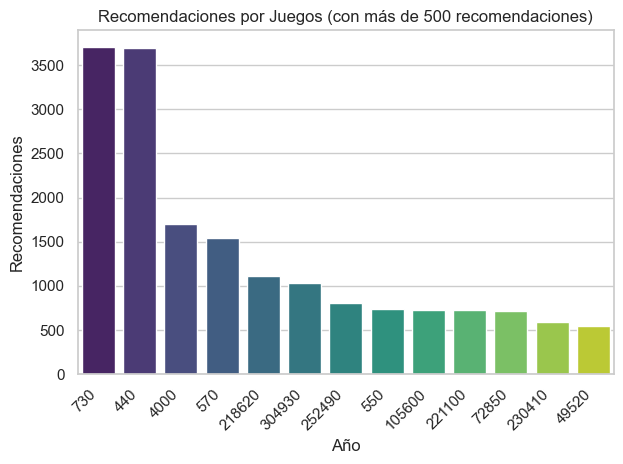

In [30]:
# Filtrar juegos con cantidad mayor o igual a 500 reseñas
filtered_df = grouped_df[grouped_df['reviews'] >= 500]

# Obtener la cantidad total de reviews
total_reviews = grouped_df['reviews'].sum()

# Obtener la cantidad total de reviews para game_id con más de 500 reseñas
total_reviews_mas_de_500 = filtered_df['reviews'].sum()

# Calcular el porcentaje
porcentaje_reviews_mas_de_500 = (total_reviews_mas_de_500 / total_reviews) * 100

# Mostrar el resultado
print(f"Total de juegos con más de 500 reseñas: {len(filtered_df)}")

# Mostrar el resultado
print(f"Porcentaje de recomendaciones sobre el total: {porcentaje_reviews_mas_de_500:.2f}%")



# Crear el gráfico de barras con el DataFrame filtrado
bar_plot = sns.barplot(x=filtered_df['game_id'], y=filtered_df['reviews'], palette="viridis")

# Configurar etiquetas y título
bar_plot.set(xlabel='Año', ylabel='Recomendaciones', title='Recomendaciones por Juegos (con más de 500 recomendaciones)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se puede observar que más del 30% de las reseñas están contenidas en 13 juegos, los cuales tienen más de 500 reseñas.

### 'recommend'

Se exploran registros del campo 'recommend', cuyos valores son True o False.

recommend
True     88.466739
False    11.533261
Name: proportion, dtype: float64


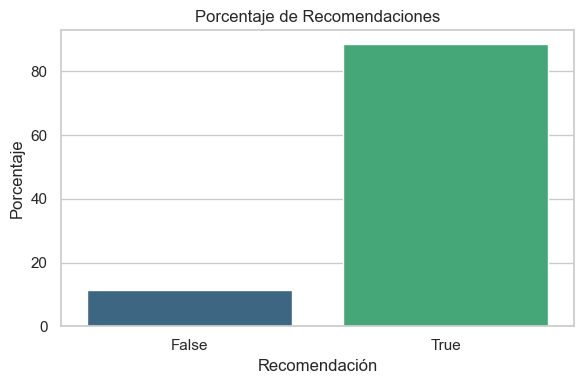

In [31]:
# Calcular el porcentaje de True y False en la columna 'recommend'
porcentaje_recomendaciones = df_reviews['recommend'].value_counts(normalize=True) * 100

# Configurar la estética del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras
bar_plot = sns.barplot(x=porcentaje_recomendaciones.index, y=porcentaje_recomendaciones.values, palette="viridis")

# Configurar etiquetas y título
bar_plot.set(xlabel='Recomendación', ylabel='Porcentaje', title='Porcentaje de Recomendaciones')
bar_plot.set_xticklabels(['False', 'True'])

print(porcentaje_recomendaciones)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Casi el 90% de las recomendaciones son positivas (True).

Vamos a explorar recomendaciones del top 10 de juegos.

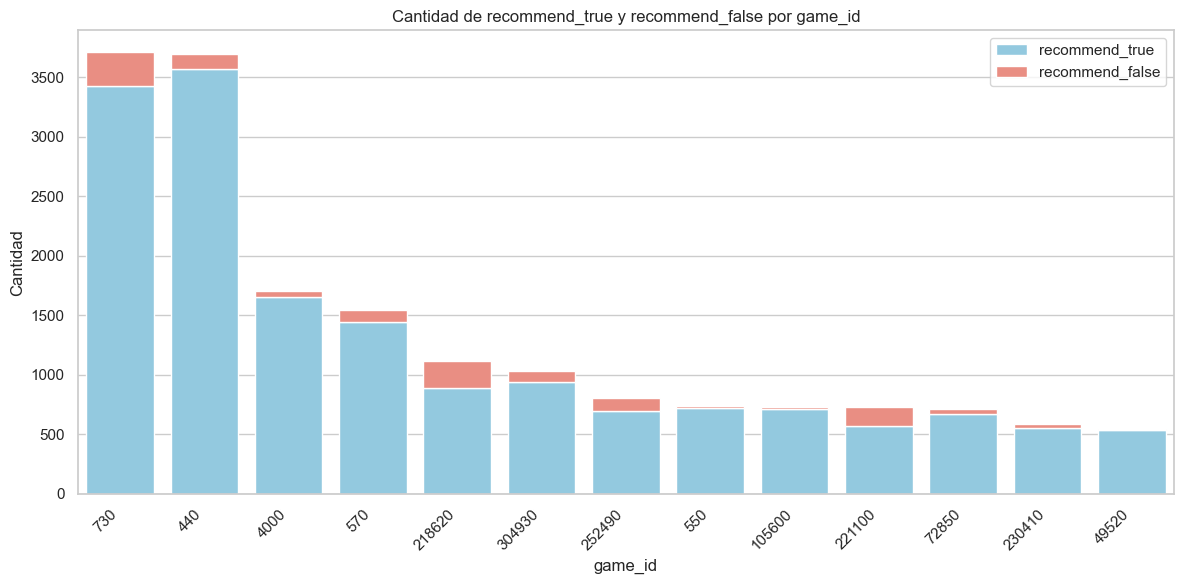

In [32]:
# Obtener valores absolutos y porcentajes por 'game_id'
agregaciones = {
    'recommend': ['sum', lambda x: x.count() - x.sum()]  # Sumar True y calcular False restando True del total
}

# Agrupar por 'game_id' y aplicar las agregaciones
resultados = df_reviews.groupby('game_id').agg(agregaciones)

# Renombrar columnas para mayor claridad
resultados.columns = ['recommend_true', 'recommend_false']

# Agregar la columna 'total_recommend'
resultados['total_recommend'] = resultados['recommend_true'] + resultados['recommend_false']

# Filtrar valores con total_recommend mayor a 500
resultados_filtrados = resultados[resultados['total_recommend'] > 500]

# Ordenar el DataFrame por 'total_recommend' de mayor a menor
resultados_filtrados = resultados_filtrados.sort_values(by='total_recommend', ascending=False)

# Configurar la estética del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
bar_plot = sns.barplot(x=resultados_filtrados.index, y=resultados_filtrados['recommend_true'], color='skyblue', label='recommend_true')
bar_plot = sns.barplot(x=resultados_filtrados.index, y=resultados_filtrados['recommend_false'], color='salmon', label='recommend_false', bottom=resultados_filtrados['recommend_true'])

# Configurar etiquetas y título
bar_plot.set(xlabel='game_id', ylabel='Cantidad', title='Cantidad de recommend_true y recommend_false por game_id')
plt.legend()

# Rotar las etiquetas del eje x para mejorar la legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En todos los casos se observa que la gran mayoria de las recomendaciones son positivas.

### 'sentiment'

Este es el campo generado a partir del análisis de sentimientos aplicado al campo 'review' (que fue descartado en el ETL luego de generar los valores de 'sentiment').

Los valores representan sentimientos:
- 2: positivos.
- 1: neutrales.
- 0: negativos.

Se puede observar que la gran mayoría de los valores son positivos.

sentiment
2    67.785936
1    18.141055
0    14.073009
Name: proportion, dtype: float64


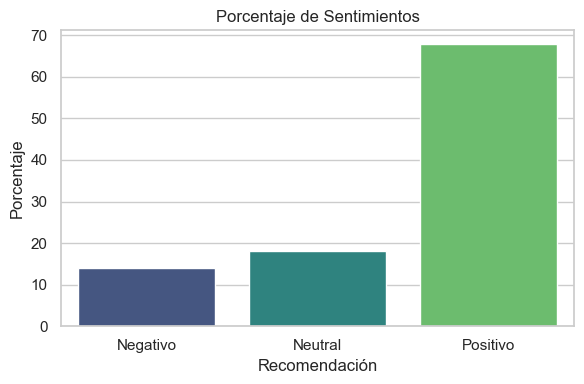

In [33]:
# Calcular el porcentaje de sentiment 0, 1 y 2 
porcentaje_sentiments = df_reviews['sentiment'].value_counts(normalize=True) * 100

# Configurar la estética del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras
bar_plot = sns.barplot(x=porcentaje_sentiments.index, y=porcentaje_sentiments.values, palette="viridis")

# Configurar etiquetas y título
bar_plot.set(xlabel='Recomendación', ylabel='Porcentaje', title='Porcentaje de Sentimientos')
bar_plot.set_xticklabels(['Negativo', 'Neutral', 'Positivo'])

print(porcentaje_sentiments)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se observan valores consistenten con el campo 'recommend', con algunas diferencias no muy significativas.

El porcentaje de 'recommend' = False ronda el 11%, mientras el que 'sentiment' = 0 ronda el 14%.
Ambos valores corresponden a un indicador de recomendación negativa.

En el caso de lo que sería una recomendación positiva, 'recommend' = True ronda el 90% mientras que 'sentiment' = 2 se encuentra en 67%.

Dado que 'sentiment' no es de valor binario como 'recommend', nos encontramos con los valores 1 que son neutrales.

A partir de esta información se podría concluir que el análisis de sentimientos realizados en '1.2 ETL reviews' dió resultados consistentes.

Vamos a cruzar los datos de ambos campos para verificar.

### Relación 'recommend' / 'sentiment'

Valores absolutos cruzados
 sentiment     0      1      2  Total
recommend                           
False      2382   1100   3257   6739
True       5841   9500  36351  51692
Total      8223  10600  39608  58431 




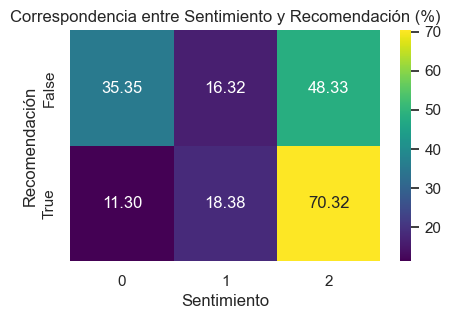

Valores absolutos y porcentajes para recommend=True y sentiment=2:
   - Absoluto: 36351
   - Porcentaje: 70.32%

Valores absolutos y porcentajes para recommend=False y sentiment=0:
   - Absoluto: 2382
   - Porcentaje: 6.01%


In [34]:
# Cruce de datos
crosstab_df = pd.crosstab(df_reviews['recommend'], df_reviews['sentiment'], margins=True, margins_name='Total')

# Mostrar el nuevo DataFrame cruzado
print("Valores absolutos cruzados\n", crosstab_df, "\n\n")

# Cruce de datos porcentajes
crosstab_df_perc = pd.crosstab(df_reviews['recommend'], df_reviews['sentiment'], normalize='index') * 100


# Configurar la estética y la paleta del gráfico
sns.set(style="whitegrid")
sns.set_palette("viridis")

# Crear el heatmap
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(crosstab_df_perc, annot=True, cmap="viridis", fmt='.2f', cbar=True)

# Configurar etiquetas y título
heatmap.set(xlabel='Sentimiento', ylabel='Recomendación', title='Correspondencia entre Sentimiento y Recomendación (%)')

# Mostrar el gráfico
plt.show()

# Filtrar el DataFrame para obtener las combinaciones específicas
true_positive = df_reviews[(df_reviews['recommend'] == True) & (df_reviews['sentiment'] == 2)]
false_negative = df_reviews[(df_reviews['recommend'] == False) & (df_reviews['sentiment'] == 0)]

# Obtener los valores absolutos y porcentajes
true_positive_count = len(true_positive)
false_negative_count = len(false_negative)

total_recommend_true = crosstab_df.at[True, 'Total']
total_sentiment_2 = crosstab_df.at['Total', 2]

true_positive_percentage = (true_positive_count / total_recommend_true) * 100
false_negative_percentage = (false_negative_count / total_sentiment_2) * 100

# Mostrar los resultados
print(f"Valores absolutos y porcentajes para recommend=True y sentiment=2:")
print(f"   - Absoluto: {true_positive_count}")
print(f"   - Porcentaje: {true_positive_percentage:.2f}%\n")

print(f"Valores absolutos y porcentajes para recommend=False y sentiment=0:")
print(f"   - Absoluto: {false_negative_count}")
print(f"   - Porcentaje: {false_negative_percentage:.2f}%")

En lineas generales, se puede decir que se corresponden más del 75% de los datos correctamente.

En términos de correspondencias correctas ('sentiment' = 2 con 'recommend' = True o 'sentiment' = 0 con 'recommend' = False) se observa:
- Del total de 'recommend' = False poco más del 35% se clasificó como negativo.
- Del total de 'recommend' = True poco más del 70% se clasificó como positivo.

Entre 15-20% de los datos fueron clasificados con sentimiento neutral.

Esto muestra particularmente inconsistencias al momento de identificar valores negativos.

La mayoria de registros con recomendación falsa fueron clasificados como positivos.

Esto puede deberse bien a falta de precisión del algoritmo de análisis aplicado, así como a contradicciones de los usuarios (calificar con 'recommend' = False y luego escribir comentarios positivos).

En el ETL se realizaron pruebas varias con distintos algoritmos y parámentros, llegando a resultados similares.

Sin embargo, este aspecto del proyecto queda como una oportunidad de mejora para otras versiones.


### 'posted_year'

Se explora cantidad de reseñas por año.

In [35]:
# Agrupar por 'posted_year' y contar las observaciones
df_agrupado = df_reviews.groupby('posted_year').size().reset_index(name='cantidad_observaciones')

# Ordenar el DataFrame por la columna 'posted_year' de mayor a menor
df_ordenado = df_agrupado.sort_values(by='posted_year', ascending=False)

# Calcular el porcentaje sobre el total
total_observaciones = df_ordenado['cantidad_observaciones'].sum()
df_ordenado['porcentaje_total'] = ((df_ordenado['cantidad_observaciones'] / total_observaciones) * 100).round(2)

# Mostrar el nuevo DataFrame
df_ordenado

,posted_year,cantidad_observaciones,porcentaje_total
6,2015,18154,31.07
5,2014,21834,37.37
4,2013,6713,11.49
3,2012,1201,2.06
2,2011,530,0.91
1,2010,66,0.11
0,0,9933,17.00


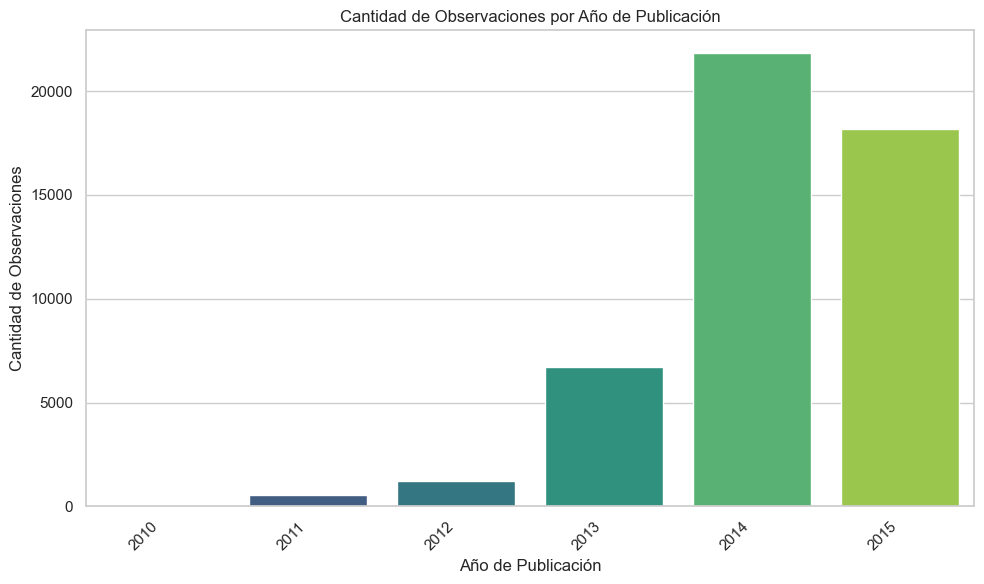

In [36]:
# Filtrar valores de posted_year diferentes de 0
df_filtered = df_reviews[df_reviews['posted_year'] != 0]

# Configurar la estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
bar_plot = sns.countplot(x=df_filtered['posted_year'], palette="viridis")

# Configurar etiquetas y título
bar_plot.set(xlabel='Año de Publicación', ylabel='Cantidad de Observaciones', title='Cantidad de Observaciones por Año de Publicación')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Nuevamente se puede observar una tendencia creciente a lo largo de los años, con un salto cuantitativo importante en el 2014.

### Relación 'game_id' / 'posted_year'

Se exploran los juegos con más cantidad de reseñas por año.

In [37]:
# Filtrar valores de posted_year diferentes de 0
df_filtered = df_reviews[df_reviews['posted_year'] != 0]

# Encontrar el game_id con más reseñas por posted_year
top_game_per_year = df_filtered.groupby(['posted_year', 'game_id']).size().reset_index(name='cantidad_resenas')
idx = top_game_per_year.groupby(['posted_year'])['cantidad_resenas'].transform(max) == top_game_per_year['cantidad_resenas']
top_game_per_year = top_game_per_year[idx]

# Mostrar el resultado
top_game_per_year


,posted_year,game_id,cantidad_resenas
29,2010,440,11
155,2011,440,81
439,2012,440,266
1115,2013,440,802
2674,2014,440,1575
4906,2015,730,1656


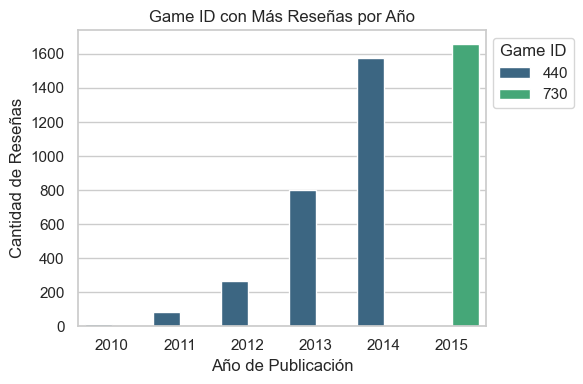

In [38]:
# Configurar la estética
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras
bar_plot = sns.barplot(x='posted_year', y='cantidad_resenas', hue='game_id', data=top_game_per_year, palette="viridis", dodge=True)

# Configurar etiquetas y título
bar_plot.set(xlabel='Año de Publicación', ylabel='Cantidad de Reseñas', title='Game ID con Más Reseñas por Año')
bar_plot.legend(title='Game ID', bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se observa que el juego con 'game_id' 440 encabezó el top de reseñas hasta el 2014, siendo superado por el 730 en 2015.

También se aprecia en este caso el aumento de reseñas a lo largo de los años.

Se da por finalizada la exploración del dataset.